# Analysis and Considerations 

1)Visualization analysis of weather in 500+ cities at different latitudes relative to the equator line. The visualizations show temperature, humidity, cloudiness, wind speed using OpenWeatherMap API and Citypy module.
2)The temperature increases as we approach the equator. However, temperature peaks at around some degrees latitude, not exactly at the equatorial line. This may be due to the Earth's tilt in the axis known as obliquity.
3)Cloudiness and humidity do not show a strong correlation to latitude. The visualizations below show a great variety of values at similar latitudes.
4)Wind speed appears to slightly increase as we move away from the equator. We would need to go beyond the range to examine and to make a definitive conclusion.
5)From the visualizations , we can conclude temperature seems to have a clear correlation with latitude.
6)The southern hemisphere tends to be warmer than the northern hemisphere.
7)There is no strong co relationship for latitude with cloudiness, humidity and wind speed.

# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import csv
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
    
# Print the city count to confirm sufficient count
len(cities)

599

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
#OpenWeather Key

units = "Imperial"

query_url =  f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={units}"
query_url
weather_data = []
print("Beginning Data Retrieval ")
print("----------------------------")
for city in cities:
    city_url = query_url + "&q=" + city
    response = requests.get(city_url)
    try:
        response_json = response.json()
        #print(response_json)
        lat = response_json['coord']['lat']
        lon = response_json['coord']['lon']
        temp_max = response_json['main']['temp_max']
        humidity = response_json['main']['humidity']
        cloudiness = response_json['clouds']['all']
        wind_speed = response_json['wind']['speed']
        country = response_json['sys']['country']
        date = response_json['dt']
        weather_data.append({"City": city,
                    "Lat": lat,
                    "Lng": lon,
                    "Max Temp": temp_max,
                    "Humidity": humidity,
                    "Cloudiness": cloudiness,
                    "Wind Speed": wind_speed,
                    "Country": country,
                    "Date": date})
        print(f"Processing : {city}")
    except:
        print("City not found. Skipping...")
        
print("----------------------------")
print("Data Retrieval Complete")
print("----------------------------")

Beginning Data Retrieval 
----------------------------
Processing : komsomolskiy
Processing : muros
Processing : east london
Processing : amahai
Processing : cascais
Processing : mataura
City not found. Skipping...
Processing : avarua
Processing : hilo
City not found. Skipping...
Processing : yokadouma
Processing : namibe
City not found. Skipping...
Processing : rawson
Processing : walker
Processing : arraial do cabo
Processing : albany
Processing : butaritari
City not found. Skipping...
Processing : cherskiy
Processing : aswan
Processing : altay
Processing : leh
City not found. Skipping...
Processing : hithadhoo
City not found. Skipping...
Processing : padang
City not found. Skipping...
Processing : port alfred
Processing : ushuaia
Processing : kapaa
Processing : bredasdorp
Processing : okitipupa
Processing : thompson
Processing : punta arenas
Processing : atuona
Processing : rikitea
Processing : olafsvik
Processing : kapit
Processing : vila franca do campo
Processing : shelburne
Proc

Processing : flin flon
Processing : ornskoldsvik
Processing : banyo
Processing : bud
Processing : santiago del estero
Processing : heilbron
Processing : katsuura
Processing : ranong
Processing : eyemouth
Processing : talara
Processing : tuatapere
Processing : haines junction
Processing : prince rupert
City not found. Skipping...
Processing : yulara
City not found. Skipping...
Processing : makasar
Processing : muzaffarabad
Processing : luanda
Processing : panacan
Processing : genova
Processing : saint-pierre
Processing : tarime
City not found. Skipping...
Processing : rio grande
Processing : moerai
Processing : solnechnyy
Processing : ixtapa
Processing : ancud
Processing : cabo san lucas
Processing : kropotkin
Processing : maralal
City not found. Skipping...
Processing : bathsheba
Processing : saint george
Processing : punta alta
City not found. Skipping...
Processing : zhezkazgan
Processing : tondano
Processing : bantry
Processing : paamiut
Processing : vagur
Processing : buta
Processi

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
city_data_df = pd.DataFrame(weather_data)
city_data_df.count()

City          553
Lat           553
Lng           553
Max Temp      553
Humidity      553
Cloudiness    553
Wind Speed    553
Country       553
Date          553
dtype: int64

In [7]:
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,komsomolskiy,40.43,71.72,64.40,52,100,4.70,UZ,1587774471
1,muros,42.78,-9.06,57.00,89,82,1.01,ES,1587774471
2,east london,-33.02,27.91,66.61,83,79,11.18,ZA,1587774472
3,amahai,-3.33,128.92,83.50,73,76,2.51,ID,1587774472
4,cascais,38.70,-9.42,59.00,82,40,4.70,PT,1587774472


In [8]:
city_data_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,5.530000e+02
mean,19.519928,19.105407,61.861646,68.741410,49.989150,8.034919,1.587775e+09
std,32.365138,91.011788,19.269329,21.180471,36.833742,5.107076,6.947587e+01
min,-54.800000,-175.200000,-0.400000,1.000000,0.000000,0.470000,1.587774e+09
25%,-6.880000,-63.060000,48.000000,57.000000,16.000000,4.380000,1.587775e+09
50%,21.460000,24.430000,64.760000,73.000000,45.000000,6.930000,1.587775e+09
75%,47.170000,100.350000,78.800000,86.000000,90.000000,10.710000,1.587775e+09
max,77.480000,179.320000,95.340000,100.000000,100.000000,29.970000,1.587775e+09


In [9]:
city_data_df.to_csv(output_data_file, index_label='City_ID')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pimentel,-6.84,-79.93,66.20,29,75,5.82,PE,1585764415
1,victoria,22.29,114.16,69.01,88,40,18.34,HK,1585764288
2,padang,-0.95,100.35,79.90,75,99,1.63,ID,1585764115
3,hasaki,35.73,140.83,55.00,100,75,4.70,JP,1585764415
4,kahului,20.89,-156.47,70.00,88,1,7.63,US,1585764415


In [9]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

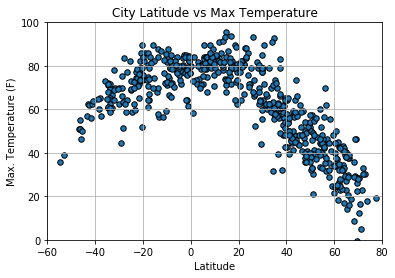

In [10]:
#Create a Scatter Plot for Lattitude vs Temperature of City
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker='o',s=30, edgecolors= "black")
plt.title("City Latitude vs Max Temperature")

plt.ylim(0,100)
plt.xlim(-60, 80)

plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid()
# plt.show()

plt.savefig("LAT VS TEMP.png")

## Latitude vs. Humidity Plot

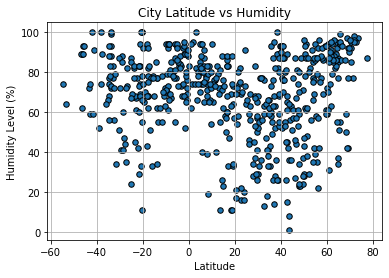

In [11]:
#Create a Scatter Plot for Lattitude vs Humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker='o', s=30, edgecolors= "black")
plt.title("City Latitude vs Humidity")
plt.ylabel("Humidity Level (%)")
plt.xlabel("Latitude")
plt.grid()
# plt.show()

plt.savefig('LAT VS HUM.png')

## Latitude vs. Cloudiness Plot

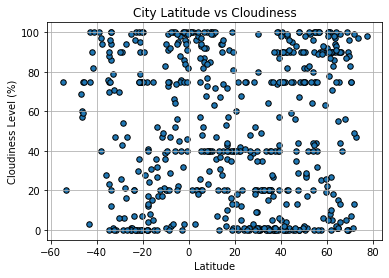

In [12]:
#Create a Scatter Plot for Lattitude vs Cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker='o', s=30, edgecolors= "black")
plt.title("City Latitude vs Cloudiness")
plt.ylabel("Cloudiness Level (%)")
plt.xlabel("Latitude")
plt.grid()
# plt.show()

plt.savefig('LAT VS CLOUD.png')

## Latitude vs. Wind Speed Plot

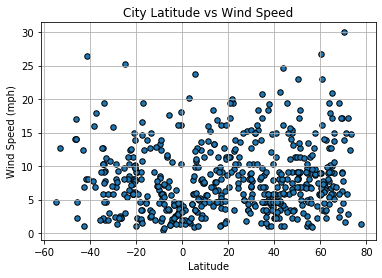

In [13]:
#Create a Scatter Plot for Lattitude vs WindSpeed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker='o', s=30, edgecolors= "black")
plt.title("City Latitude vs Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid()
# plt.show()

plt.savefig('LAT VS WIND.png')

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots
def linear_reg(x_values,y_values,feature,xy_coord,x_lim,y_lim):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(f"R squared: {rvalue**2}")
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"red")
    plt.annotate(line_eq,xy_coord,fontsize=15,color="red")
    plt.ylim(y_lim)
    plt.xlim(x_lim)
    plt.ylabel(feature)
    plt.xlabel('Latitude')
   

In [15]:
# Create Northern and Southern Hemisphere DataFrames

northern_hemisphere = city_data_df.loc[city_data_df["Lat"]>0.01]
southern_hemisphere = city_data_df.loc[city_data_df["Lat"]<-0.01]

print(northern_hemisphere.head())
southern_hemisphere.head()

           City    Lat     Lng  Max Temp  Humidity  Cloudiness  Wind Speed  \
0  komsomolskiy  40.43   71.72     64.40        52         100        4.70   
1         muros  42.78   -9.06     57.00        89          82        1.01   
4       cascais  38.70   -9.42     59.00        82          40        4.70   
7          hilo  19.73 -155.09     80.60        57          40       11.41   
8     yokadouma   3.52   15.05     73.85        66          20        1.43   

  Country        Date  
0      UZ  1587774471  
1      ES  1587774471  
4      PT  1587774472  
7      US  1587774407  
8      CM  1587774474  


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,east london,-33.02,27.91,66.61,83,79,11.18,ZA,1587774472
3,amahai,-3.33,128.92,83.50,73,76,2.51,ID,1587774472
5,mataura,-46.19,168.86,51.01,89,60,14.00,NZ,1587774472
6,avarua,-21.21,-159.78,82.40,74,79,8.05,CK,1587774473
9,namibe,-15.20,12.15,74.55,68,0,5.46,AO,1587774475


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R squared: 0.7751444730900695


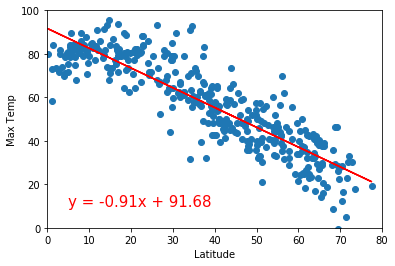

In [16]:
#Create a Scatter Plot for Lattitude vs Temperature of City
x_values = northern_hemisphere['Lat']
#print(x_values)
y_values = northern_hemisphere['Max Temp']
#print(y_values)
xy_coord = (5,10)
x_lim = (0,80)
y_lim = (0,100)
linear_reg(x_values,y_values,'Max Temp',xy_coord,x_lim,y_lim)
plt.savefig("NORTH MAX TEMP VS LAT.png")


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R squared: 0.4330325534467647


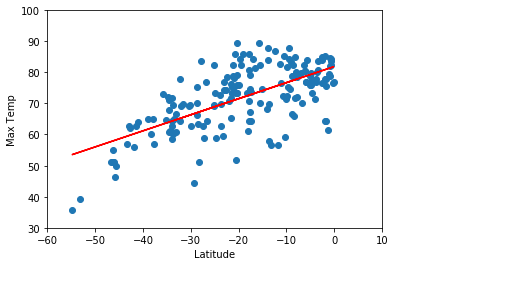

In [17]:
#Create a Scatter Plot for Lattitude vs Temperature of City (Southern Hemisphere)
x_values = southern_hemisphere['Lat']
#print(x_values)
y_values = southern_hemisphere['Max Temp']
#print(y_values)
xy_coord = (6,10)
x_lim = (-60,10)
y_lim = (30,100)
linear_reg(x_values,y_values,'Max Temp',xy_coord,x_lim,y_lim)
plt.savefig("SOUTH MAX TEMP VS LAT.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squared: 0.02138629421741112


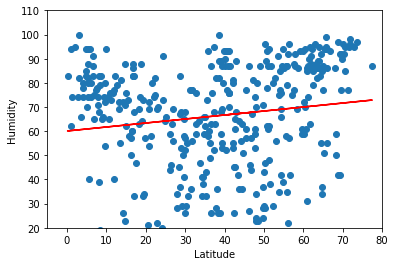

In [18]:
x_values = northern_hemisphere['Lat']
#print(x_values)
y_values = northern_hemisphere['Humidity']
#print(y_values)
xy_coord = (6,10)
x_lim = (-5,80)
y_lim = (20,110)
linear_reg(x_values,y_values,'Humidity',xy_coord,x_lim,y_lim)

plt.savefig("NORTH HUM VS LAT.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squared: 0.006151460745044142


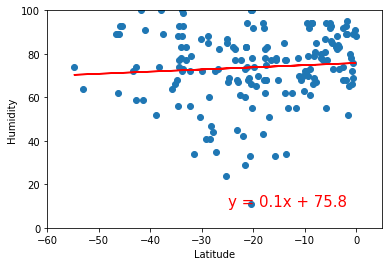

In [19]:
x_values = southern_hemisphere['Lat']
#print(x_values)
y_values = southern_hemisphere['Humidity']
#print(y_values)
xy_coord = (-25,10)
x_lim = (-60,5)
y_lim = (0,100)
linear_reg(x_values,y_values,'Humidity',xy_coord,x_lim,y_lim)

plt.savefig("NORTH HUM VS LAT.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squared: 0.003340039759394215


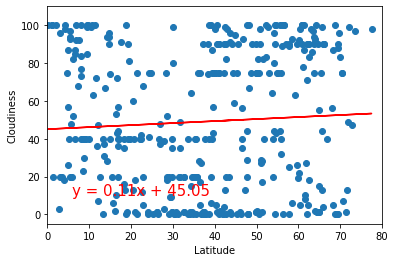

In [20]:
x_values = northern_hemisphere['Lat']
#print(x_values)
y_values = northern_hemisphere['Cloudiness']
#print(y_values)
xy_coord = (6,10)
x_lim = (0,80)
y_lim = (-5,110)
linear_reg(x_values,y_values,'Cloudiness',xy_coord,x_lim,y_lim)
plt.savefig("NORTH CLOUD VS LAT.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squared: 0.0009400263011726398


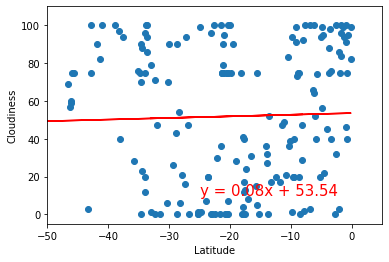

In [21]:
x_values = southern_hemisphere['Lat']
#print(x_values)
y_values = southern_hemisphere['Cloudiness']
#print(y_values)
xy_coord = (-25,10)
x_lim = (-50,5)
y_lim = (-5,110)
linear_reg(x_values,y_values,'Cloudiness',xy_coord,x_lim,y_lim)
plt.savefig("SOUTH CLOUD VS LAT.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squared: 0.012615670640732879


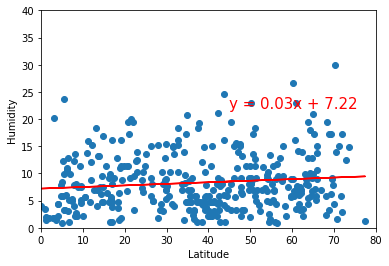

In [22]:
x_values = northern_hemisphere['Lat']
#print(x_values)
y_values = northern_hemisphere['Wind Speed']
#print(y_values)
xy_coord = (45,22)
x_lim = (0,80)
y_lim = (0,40)
linear_reg(x_values,y_values,'Humidity',xy_coord,x_lim,y_lim)

plt.savefig("NORTH WIND VS LAT.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squared: 0.012615670640732879


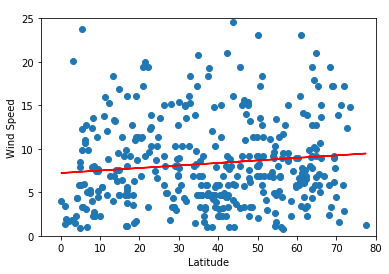

In [23]:
x_values = northern_hemisphere['Lat']
#print(x_values)
y_values = northern_hemisphere['Wind Speed']
#print(y_values)
xy_coord = (-10,25)
x_lim = (-5,80)
y_lim = (0,25)
linear_reg(x_values,y_values,'Wind Speed',xy_coord,x_lim,y_lim)

plt.savefig("NORTH HUM VS LAT.png")